In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score

from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=final_tr.columns,
                                class_names=['No_Fraud','Fraud'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [4]:
from catboost import CatBoostClassifier


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_dataset.csv')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Gender                      500 non-null    object 
 2   Total_Bilirubin             500 non-null    float64
 3   Direct_Bilirubin            500 non-null    float64
 4   Alkaline_Phosphotase        500 non-null    int64  
 5   Alamine_Aminotransferase    500 non-null    int64  
 6   Aspartate_Aminotransferase  500 non-null    int64  
 7   Total_Protiens              500 non-null    float64
 8   Albumin                     500 non-null    float64
 9   Albumin_and_Globulin_Ratio  496 non-null    float64
 10  Liver_Problem               500 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 43.1+ KB


In [5]:
df.Albumin_and_Globulin_Ratio = df.Albumin_and_Globulin_Ratio.fillna(df.Albumin_and_Globulin_Ratio.median())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Gender                      500 non-null    object 
 2   Total_Bilirubin             500 non-null    float64
 3   Direct_Bilirubin            500 non-null    float64
 4   Alkaline_Phosphotase        500 non-null    int64  
 5   Alamine_Aminotransferase    500 non-null    int64  
 6   Aspartate_Aminotransferase  500 non-null    int64  
 7   Total_Protiens              500 non-null    float64
 8   Albumin                     500 non-null    float64
 9   Albumin_and_Globulin_Ratio  500 non-null    float64
 10  Liver_Problem               500 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 43.1+ KB


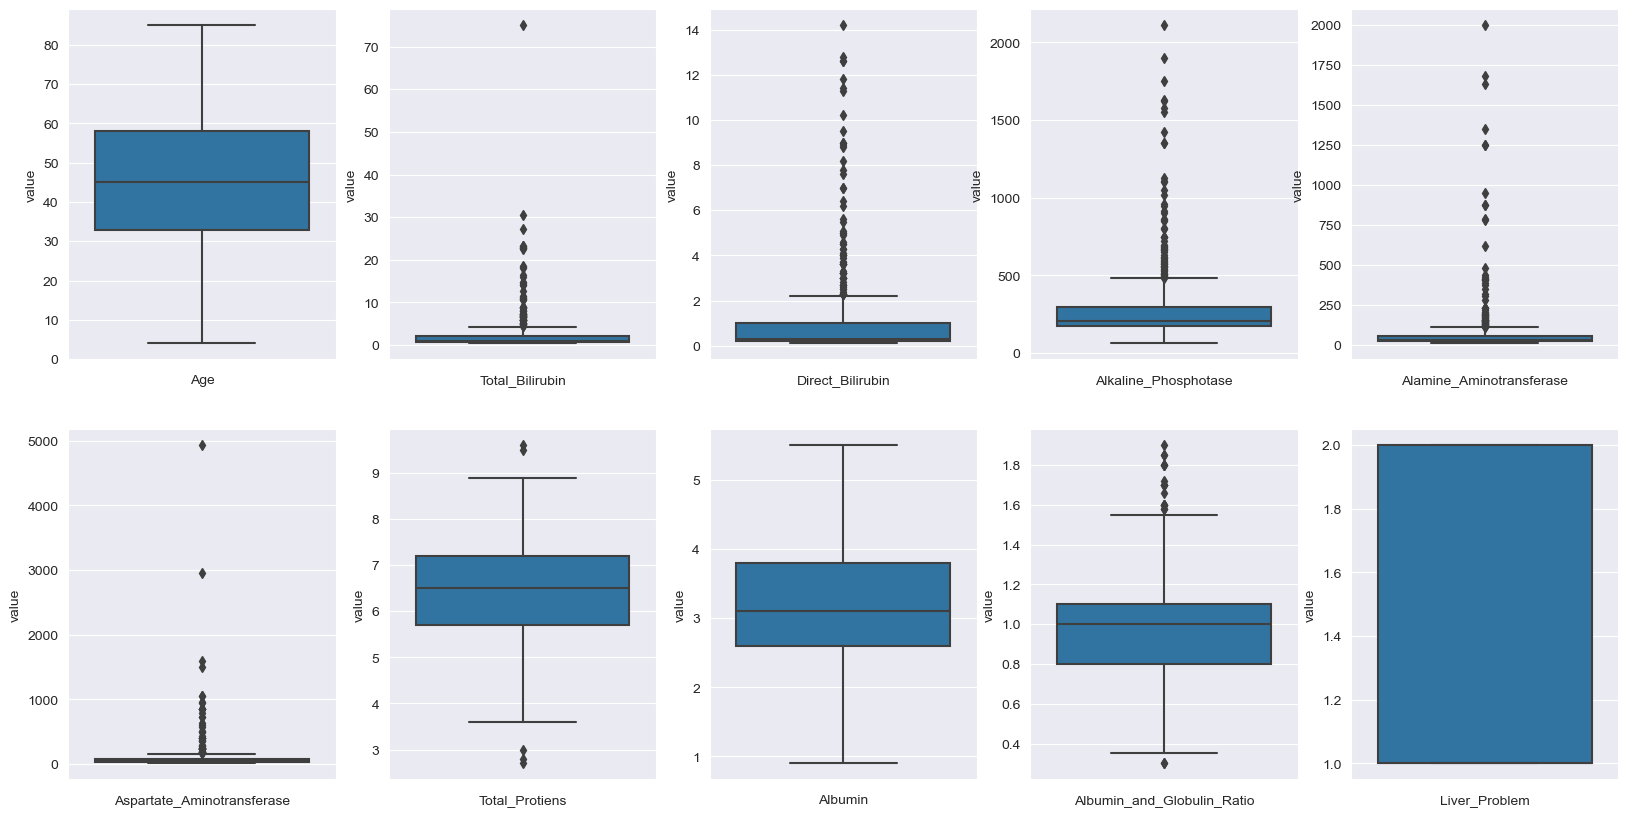

In [7]:
viz = df.drop('Gender', axis = 1)
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

for col, figIndx in zip(viz, ax.flatten()):
    sns.boxplot(y = viz[col], ax = figIndx).set(ylabel="value", xlabel = col)


In [8]:
numCols = df.select_dtypes(exclude = 'object').columns
catCols = df.drop(numCols, axis = 1)

In [ ]:
#EDA Stuff here

In [9]:
df = pd.get_dummies(data=df)

In [25]:
df.head()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   
2   62              7.3               4.1                   490   
3   58              1.0               0.4                   182   
4   72              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Liver_Problem  Gender_Female  \
0      3.3                        0.90              1              1   
1      3.2                        0.74              1              0   
2      3.3                        0.89              1              0   
3      3.4                        1.00              1              0   
4      2.4                        0.40              1              0   

   Gender_Male  
0            0  
1            1  
2            1  
3            1  
4            1

In [13]:
df = df[df['Total_Bilirubin'] < 70]

In [16]:
df = df[df['Aspartate_Aminotransferase'] < 2500]

In [17]:
df = df[df['Alamine_Aminotransferase'] < 1500]


In [44]:
df.shape

(495, 12)

In [43]:
df.head()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   
2   62              7.3               4.1                   490   
3   58              1.0               0.4                   182   
4   72              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Liver_Problem  Gender_Female  \
0      3.3                        0.90              1              1   
1      3.2                        0.74              0              0   
2      3.3                        0.89              1              0   
3      3.4                        1.00              1              0   
4      2.4                        0.40              1              0   

   Gender_Male  
0            0  
1            1  
2            1  
3            1  
4            1

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         495 non-null    int64  
 1   Total_Bilirubin             495 non-null    float64
 2   Direct_Bilirubin            495 non-null    float64
 3   Alkaline_Phosphotase        495 non-null    int64  
 4   Alamine_Aminotransferase    495 non-null    int64  
 5   Aspartate_Aminotransferase  495 non-null    int64  
 6   Total_Protiens              495 non-null    float64
 7   Albumin                     495 non-null    float64
 8   Albumin_and_Globulin_Ratio  495 non-null    float64
 9   Liver_Problem               495 non-null    int64  
 10  Gender_Female               495 non-null    uint8  
 11  Gender_Male                 495 non-null    uint8  
dtypes: float64(5), int64(5), uint8(2)
memory usage: 43.5 KB


In [57]:
x = df.drop('Liver_Problem', axis = 1)
y = df['Liver_Problem']

In [60]:
print(x.shape)
print(y.shape)

(495, 11)
(495,)


In [59]:
for indx, entry in enumerate(y):
    if entry == 2:
        y.iloc[indx] = 0

In [47]:
y.value_counts()

1    344
0    151
Name: Liver_Problem, dtype: int64

In [63]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [64]:
print(xtrain.shape)
print(ytrain.shape)

(346, 11)
(346,)


In [65]:
sm = SMOTE(sampling_strategy=1)
xtrain, ytrain = sm.fit_resample(xtrain, ytrain)

In [66]:
model = CatBoostClassifier()

params = {'depth'         : [4,5,6,7,8,9, 10],
              'learning_rate' : [0.01,0.02,0.03,0.04],
              'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
              }

In [54]:
xtrain.shape

(346, 11)

In [56]:
ytrain.shape


(149, 11)

In [67]:
grid = GridSearchCV(model, params, cv = 9, verbose=1)
grid.fit(xtrain, ytrain)

Fitting 9 folds for each of 280 candidates, totalling 2520 fits
0:	learn: 0.6909736	total: 146ms	remaining: 1.31s
1:	learn: 0.6889574	total: 146ms	remaining: 586ms
2:	learn: 0.6873244	total: 147ms	remaining: 343ms
3:	learn: 0.6856010	total: 147ms	remaining: 221ms
4:	learn: 0.6841566	total: 148ms	remaining: 148ms
5:	learn: 0.6832250	total: 148ms	remaining: 98.7ms
6:	learn: 0.6812132	total: 148ms	remaining: 63.6ms
7:	learn: 0.6794383	total: 149ms	remaining: 37.2ms
8:	learn: 0.6776688	total: 149ms	remaining: 16.6ms
9:	learn: 0.6757014	total: 149ms	remaining: 0us
0:	learn: 0.6917302	total: 675us	remaining: 6.08ms
1:	learn: 0.6900358	total: 1.11ms	remaining: 4.43ms
2:	learn: 0.6883155	total: 1.48ms	remaining: 3.45ms
3:	learn: 0.6868059	total: 1.86ms	remaining: 2.79ms
4:	learn: 0.6853910	total: 2.27ms	remaining: 2.27ms
5:	learn: 0.6842672	total: 2.69ms	remaining: 1.79ms
6:	learn: 0.6821559	total: 3.1ms	remaining: 1.33ms
7:	learn: 0.6806358	total: 3.47ms	remaining: 866us
8:	learn: 0.6791757	t

GridSearchCV(cv=9,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000023CE41B5970>,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]},
             verbose=1)

In [69]:
grid.best_params_

{'depth': 10, 'iterations': 70, 'learning_rate': 0.04}

In [77]:
model.fit(xtrain, ytrain)

Learning rate set to 0.007689
0:	learn: 0.6898208	total: 3.08ms	remaining: 3.08s
1:	learn: 0.6875298	total: 4.47ms	remaining: 2.23s
2:	learn: 0.6836400	total: 5.64ms	remaining: 1.87s
3:	learn: 0.6806993	total: 6.96ms	remaining: 1.73s
4:	learn: 0.6777682	total: 8.15ms	remaining: 1.62s
5:	learn: 0.6747853	total: 9.6ms	remaining: 1.59s
6:	learn: 0.6719969	total: 11ms	remaining: 1.55s
7:	learn: 0.6697768	total: 12.2ms	remaining: 1.51s
8:	learn: 0.6677603	total: 13.6ms	remaining: 1.5s
9:	learn: 0.6648601	total: 14.9ms	remaining: 1.48s
10:	learn: 0.6622182	total: 16.2ms	remaining: 1.46s
11:	learn: 0.6595048	total: 17.5ms	remaining: 1.44s
12:	learn: 0.6568132	total: 19ms	remaining: 1.44s
13:	learn: 0.6530157	total: 20.3ms	remaining: 1.43s
14:	learn: 0.6507763	total: 21.7ms	remaining: 1.42s
15:	learn: 0.6472575	total: 23ms	remaining: 1.41s
16:	learn: 0.6440937	total: 24.3ms	remaining: 1.41s
17:	learn: 0.6405533	total: 25.7ms	remaining: 1.4s
18:	learn: 0.6377276	total: 26.9ms	remaining: 1.39s
1

In [79]:
yPred = model.predict(xtest)
print(accuracy_score(ytest, yPred)) #acc
print(recall_score(ytest, yPred)) #sensitivity
print(roc_auc_score(ytest, yPred)) #auc
print(recall_score(ytest, yPred, pos_label=0)) #specificity


0.610738255033557
0.75
0.5679824561403508
0.38596491228070173


In [70]:
model_tuned = CatBoostClassifier(depth = 10, iterations = 70, learning_rate = 0.04)

In [71]:
model_tuned.fit(xtrain, ytrain)

0:	learn: 0.6851099	total: 11.6ms	remaining: 798ms
1:	learn: 0.6790147	total: 23.1ms	remaining: 786ms
2:	learn: 0.6738345	total: 36.1ms	remaining: 806ms
3:	learn: 0.6657446	total: 51.3ms	remaining: 846ms
4:	learn: 0.6592778	total: 66ms	remaining: 857ms
5:	learn: 0.6536412	total: 77ms	remaining: 821ms
6:	learn: 0.6459165	total: 83.4ms	remaining: 751ms
7:	learn: 0.6406584	total: 94.3ms	remaining: 731ms
8:	learn: 0.6359149	total: 106ms	remaining: 715ms
9:	learn: 0.6299975	total: 117ms	remaining: 704ms
10:	learn: 0.6238356	total: 128ms	remaining: 688ms
11:	learn: 0.6177799	total: 140ms	remaining: 675ms
12:	learn: 0.6138213	total: 151ms	remaining: 661ms
13:	learn: 0.6093268	total: 162ms	remaining: 647ms
14:	learn: 0.6048494	total: 174ms	remaining: 637ms
15:	learn: 0.6000063	total: 185ms	remaining: 626ms
16:	learn: 0.5950271	total: 197ms	remaining: 615ms
17:	learn: 0.5908201	total: 208ms	remaining: 602ms
18:	learn: 0.5861967	total: 220ms	remaining: 591ms
19:	learn: 0.5822630	total: 233ms	rem

In [72]:
yHat = model_tuned.predict(xtest)

In [73]:
print(accuracy_score(ytest, yHat))

0.6510067114093959


In [74]:
print(recall_score(ytest, yHat))

0.6847826086956522


In [75]:
print(roc_auc_score(ytest, yHat))

0.6406369183829139


In [76]:
print(recall_score(ytest, yHat, pos_label=0))

0.5964912280701754


<AxesSubplot:>

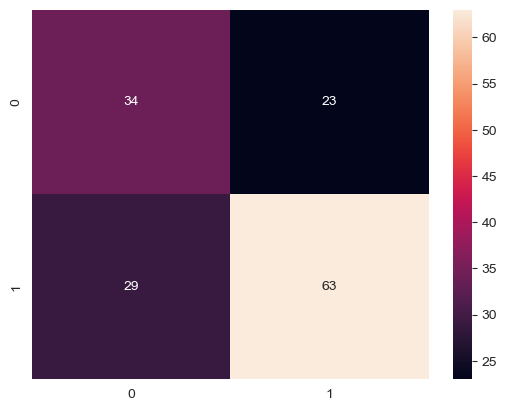

In [80]:
from sklearn.metrics import confusion_matrix

sns.heatmap(data=confusion_matrix(ytest, yHat), annot=True)

In [81]:
eval_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_new_testdataset.csv')


In [84]:
eval_data = pd.get_dummies(data=df)

In [97]:
eval_data.shape

(495, 12)

In [85]:
ypred = model_tuned.predict(eval_data)

In [102]:
df = pd.Series(ypred, name='prediction')

In [87]:
df = pd.DataFrame(ypred, columns=['prediction'])


In [88]:
df.to_csv('C:\\Users\\edwin\\Documents\\Code\\LiverPatientPredictions.csv')

In [89]:
df.head()

Prediction
0           1
1           1
2           1
3           0
4           1

In [93]:
for indx, entry in enumerate(df):
    if entry == 0:
        df.iloc[indx] = 2

In [103]:
df.to_csv('C:\\Users\\edwin\\Documents\\Code\\LiverPatientPredictions3.csv', index=False)

In [98]:
df.tail(20)

Prediction
475           0
476           1
477           1
478           0
479           1
480           1
481           1
482           1
483           0
484           0
485           0
486           0
487           1
488           0
489           1
490           0
491           0
492           1
493           0
494           1

In [104]:
df.shape

(495,)

In [99]:
df.ravel()

AttributeError: 'DataFrame' object has no attribute 'ravel'

In [ ]:
df